##### QtMultimedia 播放聲音或音樂
QtMultimedia 是 PyQt5 裡負責播放多媒體影音的元件，使用其中的 QMediaPlayer 方法就能建立播放器，播放指定位址的影片或聲音，\
這篇教學會介紹如何在 PyQt5 視窗裡加入 QtMultimedia 元件並播放聲音，最後會實作一個簡單的音樂播放器。

建立 PyQt5 視窗物件後，透過 QtMultimedia.QMediaPlayer() 方法，就能建立播放器物件，接著就能使用對應的方法播放聲音，\
下方的程式碼執行後，開啟視窗就會播放聲音。

* 注意聲音的路徑必須與執行的 Python 路徑相同，並透過 QUrl 轉換成指定的格式。

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtCore import *
from PyQt5.QtMultimedia import *
import sys, os

app = QtWidgets.QApplication(sys.argv)
main = QtWidgets.QMainWindow()
main.setObjectName("MainWindow")
main.setWindowTitle("oxxo.studio")
main.resize(300, 300)

player = QMediaPlayer()                     # 建立播放器                    
qurl = QUrl.fromLocalFile('Data\MerryChristmasXmas.mp3')       # 取得音樂路徑
qmusic = QMediaContent(qurl)                # 建立音樂內容
player.setMedia(qmusic)                     # 將播放器與音樂內容綁定
player.setVolume(100)                       # 設定音量
player.play()                               # 播放

main.show()
sys.exit(app.exec_())

##### QMediaPlayer() 播放器常用方法 
建立播放器之後，就能使用播放器的方法操作聲音檔案，下方列出常用的操作與設定方法：

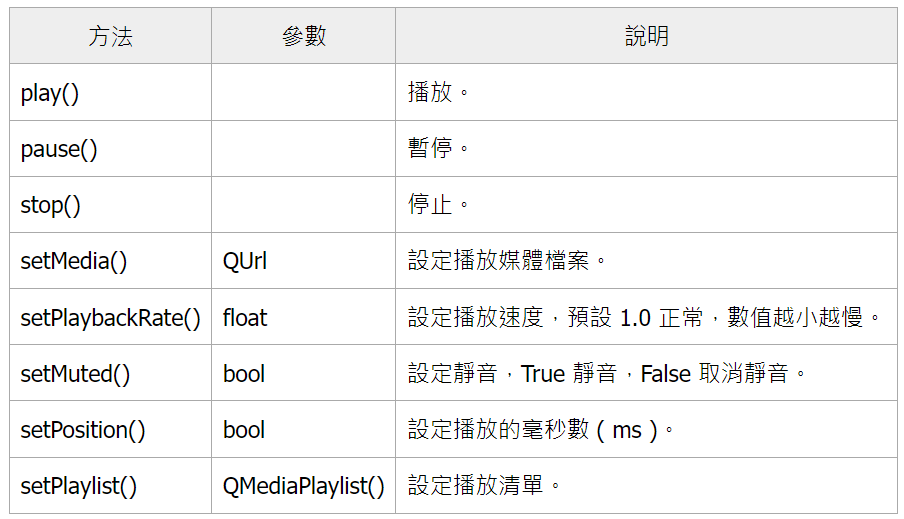

##### 取得媒體資訊的常用方法：

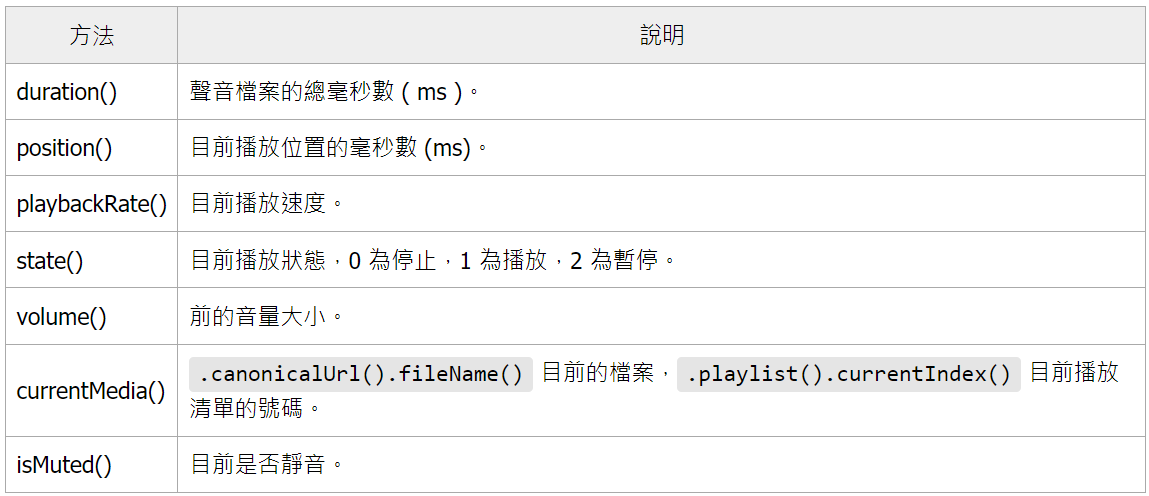

##### 媒體觸發事件的常用方法，通常會再搭配 connect 串接對應的函式：

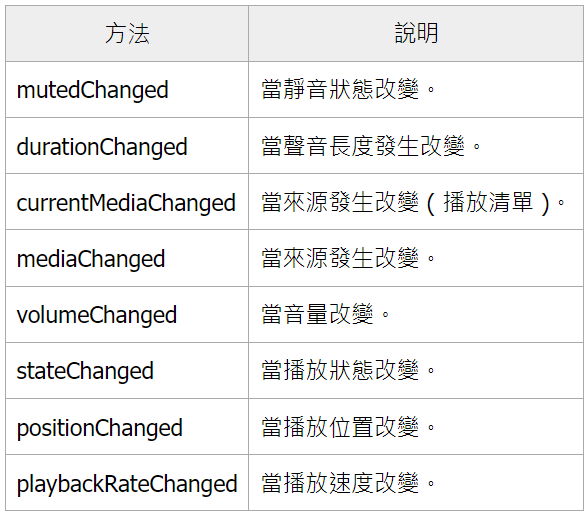

##### 簡單的音樂播放器 
在畫面中加入一些 QLabel 和 QPushButton，就能透過 QMediaPlayer() 的各種方法，做出一個簡單的音樂播放器，詳細的說明寫在下方的程式碼中。

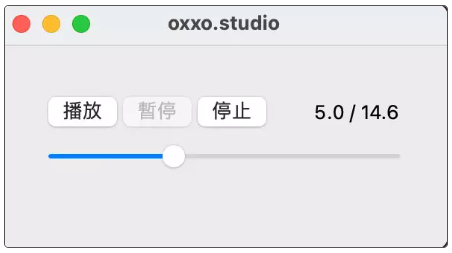

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtCore import *
from PyQt5.QtMultimedia import *
import sys, os

app = QtWidgets.QApplication(sys.argv)
main = QtWidgets.QMainWindow()
main.setObjectName("MainWindow")
main.setWindowTitle("oxxo.studio")
main.resize(300, 300)

label = QtWidgets.QLabel(main)        # 放入 QLabel 顯示時間
label.setGeometry(210, 30, 100, 30)   # 設定位置
label.setText('0.0 / 0.0')            # 預設顯示文字

# 點擊播放按鈕的程式
def f1():
    btn1.setDisabled(True)     # 停用播放按鈕
    btn2.setDisabled(False)    # 啟用暫停按鈕
    btn3.setDisabled(False)    # 啟用停止按鈕
    player.play()              # 播放聲音

# 點擊暫停按鈕的程式
def f2():
    btn1.setDisabled(False)    # 啟用播放按鈕
    btn2.setDisabled(True)     # 停用暫停按鈕
    btn3.setDisabled(False)    # 啟用停止按鈕
    player.pause()             # 暫停聲音

# 點擊停止按鈕的程式
def f3():
    btn1.setDisabled(False)    # 啟用播放按鈕
    btn2.setDisabled(False)    # 啟用暫停按鈕
    btn3.setDisabled(True)     # 停用停止按鈕
    player.stop()              # 停止聲音

btn1 = QtWidgets.QPushButton(main)  # 放入播放按鈕
btn1.setText('播放')                 # 設定文字
btn1.setGeometry(25, 30, 60, 30)    # 設定位置
btn1.setDisabled(True)              # 預設停用
btn1.clicked.connect(f1)            # 連接 f1 程式

btn2 = QtWidgets.QPushButton(main)  # 放入暫停按鈕
btn2.setText('暫停')                 # 設定文字
btn2.setGeometry(75, 30, 60, 30)    # 設定位置
btn2.clicked.connect(f2)            # 連接 f2 程式

btn3 = QtWidgets.QPushButton(main)  # 放入停止按鈕
btn3.setText('停止')                 # 設定文字
btn3.setGeometry(125, 30, 60, 30)   # 設定位置
btn3.clicked.connect(f3)            # 連接 f3 程式

slider = QtWidgets.QSlider(main)    # 放入調整滑桿
slider.setOrientation(1)            # 設定水平顯示
slider.setGeometry(30, 60, 240, 30) # 設定位置
slider.setRange(0, 100)             # 設定預設範圍
slider.setValue(50)                 # 設定預設值
slider.sliderMoved.connect(lambda: player.setPosition(slider.value())) # 當滑桿移動時，設定播放器的播放位置

player = QMediaPlayer()             # 設定播放器
path = os.getcwd()                  # 取得音樂檔案路徑
qurl = QUrl.fromLocalFile('Data\MerryChristmasXmas.mp3') # 轉換成 QUrl
music = QMediaContent(qurl)         # 讀取音樂
player.setMedia(music)              # 設定播放音樂
player.durationChanged.connect(lambda: slider.setMaximum(player.duration())) # 當總長度改變時，設定滑桿的最大值
player.play()                       # 播放音樂

# 播放器的函式
def playmusic():
    progress = player.position()    # 取的目前播放時間
    slider.setValue(progress)       # 設定滑桿位置
    label.setText(f'{str(round(progress/1000, 1))} / {str(round(player.duration()/1000, 1))}') # 文字顯示

timer = QTimer()                    # 加入定時器
timer.timeout.connect(playmusic)    # 設定定時要執行的 function
timer.start(1000)                   # 啟用定時器，設定間隔時間為 500 毫秒

main.show()
sys.exit(app.exec_())

同樣的結果也可以改用 class，寫法如下：

In [ ]:
# 導入所需的 PyQt5 模組，包括基礎的窗口組件和多媒體處理模組。
from PyQt5 import QtWidgets
from PyQt5.QtCore import *
from PyQt5.QtMultimedia import *
import sys, os

# 定義一個 MyWidget 類，繼承自 QtWidgets.QWidget，提供基本的窗口功能。
class MyWidget(QtWidgets.QWidget):
    # 類的初始化函數，設置基礎的窗口屬性和初始化界面。
    def __init__(self):
        # 調用父類的初始化函數。
        super().__init__()
        # 設置窗口的名稱，可用於樣式表等。
        self.setObjectName("MainWindow")
        # 設置窗口標題。
        self.setWindowTitle('oxxo.studio')
        # 設置窗口大小。
        self.resize(300, 200)
        # 建立用戶界面。
        self.ui()
        # 啟動音樂播放器的相關功能。
        self.run()

    # 定義 ui 方法，用於建立和配置界面元件。
    def ui(self):
        # 創建一個標籤用於顯示播放時間和總時間。
        self.label = QtWidgets.QLabel(self)
        self.label.setText('0.0 / 0.0')
        self.label.setGeometry(210, 30, 100, 30)

        # 創建按鈕並設置文本和位置，連接到相應的功能函數。
        self.btn1 = QtWidgets.QPushButton(self)
        self.btn1.setText('播放')
        self.btn1.setGeometry(25, 30, 60, 30)
        self.btn1.setDisabled(True)  # 初始狀態設為禁用。
        self.btn1.clicked.connect(self.f1)

        self.btn2 = QtWidgets.QPushButton(self)
        self.btn2.setText('暫停')
        self.btn2.setGeometry(75, 30, 60, 30)
        self.btn2.clicked.connect(self.f2)

        self.btn3 = QtWidgets.QPushButton(self)
        self.btn3.setText('停止')
        self.btn3.setGeometry(125, 30, 60, 30)
        self.btn3.clicked.connect(self.f3)

        # 創建一個滑塊用於顯示和控制播放進度。
        self.slider = QtWidgets.QSlider(self)
        self.slider.setOrientation(Qt.Horizontal)
        self.slider.setGeometry(30, 60, 240, 30)
        self.slider.setRange(0, 100)
        self.slider.setValue(50)
        self.slider.sliderMoved.connect(lambda: self.player.setPosition(self.slider.value()))

        # 創建一個 QMediaPlayer 對象。
        self.player = QMediaPlayer()
        # 設置音樂文件的路徑。
        path = os.getcwd()
        qurl = QUrl.fromLocalFile('Data\MerryChristmasXmas.mp3')
        music = QMediaContent(qurl)
        self.player.setMedia(music)
        # 當音樂的持續時間變更時，更新滑塊的最大值。
        self.player.durationChanged.connect(lambda: self.slider.setMaximum(self.player.duration()))
        self.player.play()  # 開始播放音樂。

    # 播放按鈕的功能。
    def f1(self):
        self.btn1.setDisabled(True)
        self.btn2.setDisabled(False)
        self.btn3.setDisabled(False)
        self.player.play()

    # 暫停按鈕的功能。
    def f2(self):
        self.btn1.setDisabled(False)
        self.btn2.setDisabled(True)
        self.btn3.setDisabled(False)
        self.player.pause()

    # 停止按鈕的功能。
    def f3(self):
        self.btn1.setDisabled(False)
        self.btn2.setDisabled(False)
        self.btn3.setDisabled(True)
        self.player.stop()

    # 定期更新播放進度和顯示的時間。
    def playmusic(self):
        progress = self.player.position()
        self.slider.setValue(progress)
        self.label.setText(f'{str(round(progress/1000, 1))} / {str(round(self.player.duration()/1000, 1))}')

    # 啟動一個 QTimer 來定時更新播放進度。
    def run(self):
        self.timer = QTimer()  # 創建一個 QTimer 對象。
        self.timer.timeout.connect(self.playmusic)  # 設定定時器超時時執行的函數。
        self.timer.start(1000)  # 設定定時器的間隔時間為 1000 毫秒（1秒）。

# 主程序入口，創建並運行應用。
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
    sys.exit(app.exec_())